# Partie 1 - Introduction à la Data Science et au Machine Learning

# Etape 1 - Chargement des données dans Python avec pandas


In [1]:
import pandas as pd
import numpy as np
df = pd.read_csv('weather_data_1000.csv')
# print("Contents in csv file:", df)
print(df.shape)
print(df.dtypes)

(1000, 8)
Date              object
Temperature      float64
Precipitation      int64
Humidity         float64
Latitude         float64
Longitude        float64
Temperature_F    float64
Is_Hot             int64
dtype: object


# Etape 2 - Résumé statistique des données

In [2]:
df.describe()

,Temperature,Precipitation,Humidity,Latitude,Longitude,Temperature_F,Is_Hot
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,10.551300,1.840000,51.702600,-2.700336,-0.852300,50.992340,0.085000
std,10.817936,4.368465,15.523131,51.069420,103.561562,19.472285,0.279021
min,-13.400000,0.000000,30.000000,-89.994471,-179.918266,7.880000,0.000000
25%,0.600000,0.000000,38.050000,-47.278395,-89.179462,33.080000,0.000000
50%,10.950000,0.000000,51.350000,-3.121833,-6.150004,51.710000,0.000000
75%,20.325000,0.000000,64.425000,40.446042,90.473408,68.585000,0.000000
max,30.900000,20.000000,98.800000,89.920387,179.565457,87.620000,1.000000


La température minimale est -14.2c et la température maximale est de 36.2c

# Etape 3 - Nettoyage des données (gestion des valeurs manquantes)

In [3]:
df.isnull().sum()
df['Temperature'].fillna(df['Temperature'].mean())

0      14.8
1       8.4
2      14.6
3       7.5
4      14.1
       ... 
995    11.3
996     6.4
997     8.6
998     9.1
999    12.1
Name: Temperature, Length: 1000, dtype: float64

# Etape 4 - Création de colonnes dérivées

In [4]:
df["Temp_Fahrenheit"] = df['Temperature'] * 9/5 + 32

# Etape 5 - Filtrage des données

In [5]:
df_filtered_temp = df[df['Temperature'] > 30]
print(df_filtered_temp)

                    Date  Temperature  Precipitation  Humidity   Latitude  \
247  2023-03-25 08:00:00         30.5              5      72.5  49.543929   
277  2023-04-05 06:00:00         30.9             15      61.0 -29.807788   
321  2023-04-24 10:00:00         30.3              0      78.1 -26.852560   

      Longitude  Temperature_F  Is_Hot  Temp_Fahrenheit  
247  -56.127018          86.90       1            86.90  
277 -137.022836          87.62       1            87.62  
321  -77.693654          86.54       1            86.54  


# Etape 6 - Visualisation des données avec Matplotlib

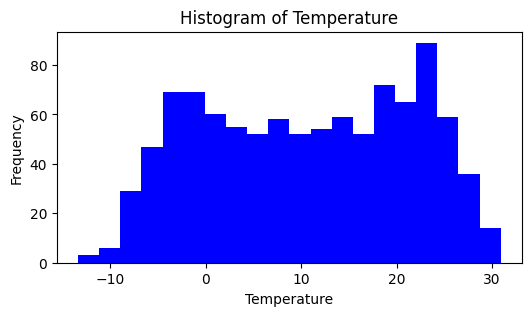

In [6]:
from matplotlib import pyplot as plt
plt.figure(figsize=(6, 3))
plt.hist(df['Temperature'], bins=20, color='blue')
plt.title('Histogram of Temperature')
plt.xlabel('Temperature')
plt.ylabel('Frequency')
plt.show()

# Etape 7 - Exploration des relations avec Seaborn

<Axes: xlabel='Temperature', ylabel='Precipitation'>

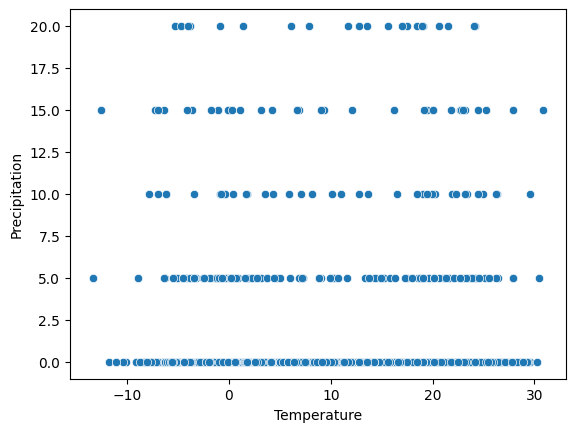

In [7]:
import seaborn as sns
sns.scatterplot(data=df, x='Temperature', y='Precipitation')

# Etape 8 - Détection des tendances temporelles

<Axes: xlabel='Date', ylabel='Temperature'>

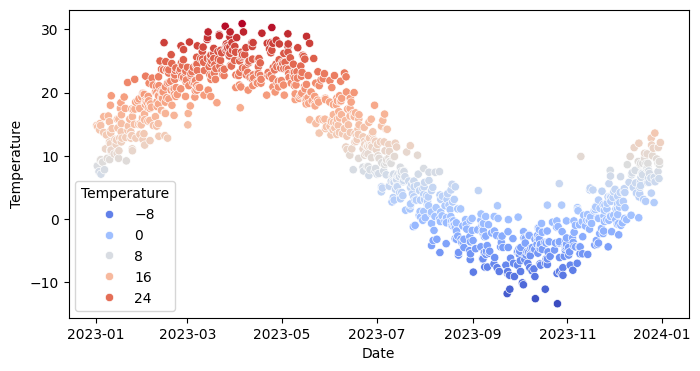

In [8]:
df['Date'] = pd.to_datetime(df['Date'])
plt.figure(figsize=(8, 4))
sns.scatterplot(data=df, x='Date', y='Temperature', hue='Temperature', palette='coolwarm')

# Etape 9 - Résumé des corrélations

<Axes: >

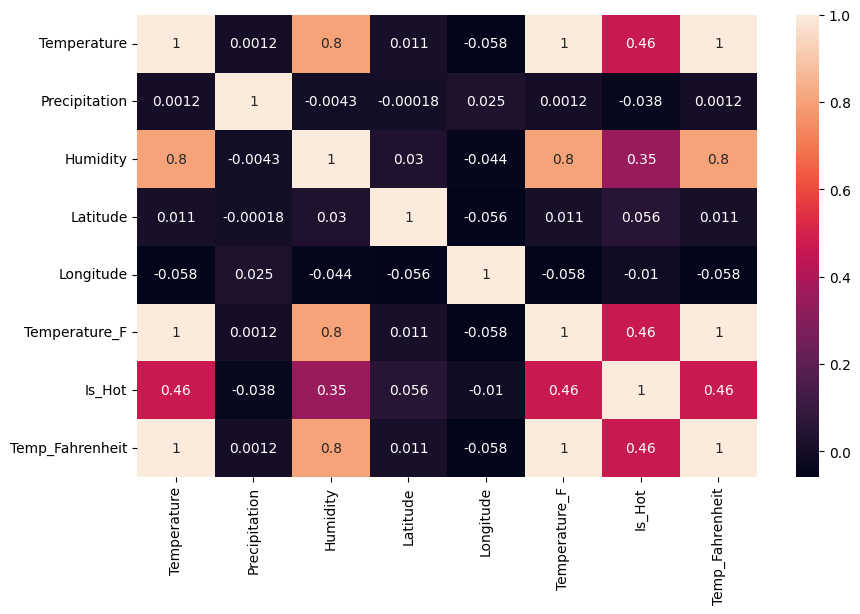

In [9]:
plt.figure(figsize=(10, 6))

sns.heatmap(df.corr(numeric_only=True), annot=True)

# Etape 10 - Exportation des données transformées

In [10]:
df.to_csv("weather_data_1000_cleaned.csv", index=False)